### Importação dos dados



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
fat_loja1 = loja1['Preço'].sum()
fat_loja2 = loja2['Preço'].sum()
fat_loja3 = loja3['Preço'].sum()
fat_loja4 = loja4['Preço'].sum()

In [4]:
tabela_faturamento = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [fat_loja1, fat_loja2, fat_loja3, fat_loja4]
})

print(tabela_faturamento)

     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


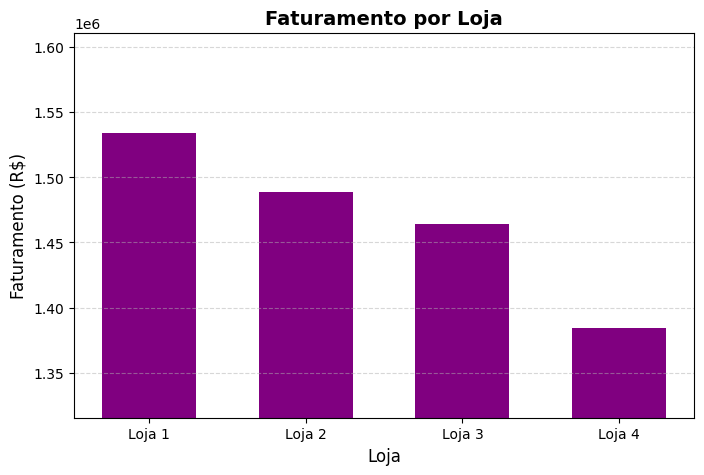

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(
    tabela_faturamento['Loja'],
    tabela_faturamento['Faturamento'],
    width=0.6,
    color='purple'
)

plt.title('Faturamento por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

minimo = tabela_faturamento['Faturamento'].min() * 0.95
maximo = tabela_faturamento['Faturamento'].max() * 1.05
plt.ylim(minimo, maximo)

plt.show()

# 2. Vendas por Categoria

In [6]:
vendas1 = loja1['Categoria do Produto'].value_counts()
vendas2 = loja2['Categoria do Produto'].value_counts()
vendas3 = loja3['Categoria do Produto'].value_counts()
vendas4 = loja4['Categoria do Produto'].value_counts()

In [7]:
tabela_vendas = pd.concat(
    [vendas1, vendas2, vendas3, vendas4],
    axis=1
)

tabela_vendas.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

print(tabela_vendas)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


In [8]:
dados = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Categoria Mais Vendida': [
        loja1['Categoria do Produto'].value_counts().idxmax(),
        loja2['Categoria do Produto'].value_counts().idxmax(),
        loja3['Categoria do Produto'].value_counts().idxmax(),
        loja4['Categoria do Produto'].value_counts().idxmax()
    ],
    'Quantidade': [
        loja1['Categoria do Produto'].value_counts().max(),
        loja2['Categoria do Produto'].value_counts().max(),
        loja3['Categoria do Produto'].value_counts().max(),
        loja4['Categoria do Produto'].value_counts().max()
    ]
}

tabela_top = pd.DataFrame(dados)
print(tabela_top)

     Loja Categoria Mais Vendida  Quantidade
0  Loja 1                 moveis         465
1  Loja 2                 moveis         442
2  Loja 3                 moveis         499
3  Loja 4                 moveis         480


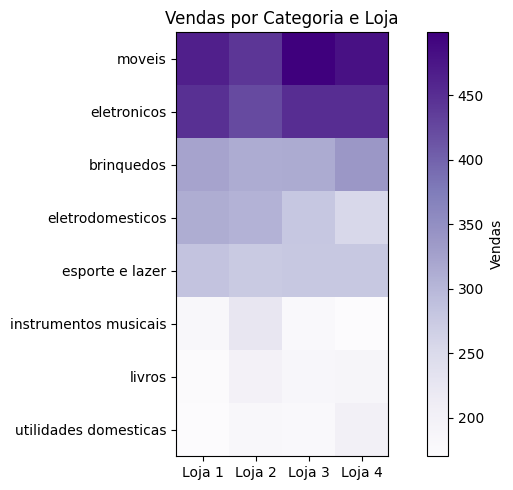

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.imshow(tabela_vendas, cmap='Purples')
plt.colorbar(label='Vendas')

plt.xticks(range(len(tabela_vendas.columns)), tabela_vendas.columns)
plt.yticks(range(len(tabela_vendas.index)), tabela_vendas.index)

plt.title('Vendas por Categoria e Loja')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [10]:
ava_loja1 = loja1['Avaliação da compra'].mean()
ava_loja2 = loja2['Avaliação da compra'].mean()
ava_loja3 = loja3['Avaliação da compra'].mean()
ava_loja4 = loja4['Avaliação da compra'].mean()

In [11]:
tabela_avaliacao = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Avaliacao Media': [ava_loja1, ava_loja2, ava_loja3, ava_loja4]
})

print(tabela_avaliacao)

     Loja  Avaliacao Media
0  Loja 1         3.976685
1  Loja 2         4.037304
2  Loja 3         4.048326
3  Loja 4         3.995759


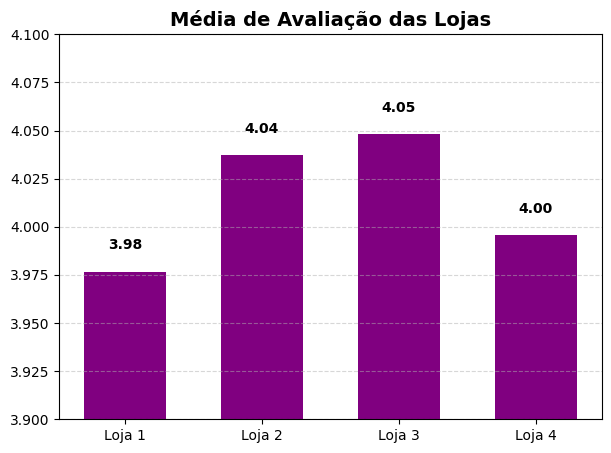

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(tabela_avaliacao['Loja'], tabela_avaliacao['Avaliacao Media'], color='purple', width=0.6)

for i, valor in enumerate(tabela_avaliacao['Avaliacao Media']):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title('Média de Avaliação das Lojas', fontsize=14, fontweight='bold')
plt.ylim(3.9, 4.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [13]:
top1 = loja1['Produto'].value_counts().head(3).reset_index()
top2 = loja2['Produto'].value_counts().head(3).reset_index()
top3 = loja3['Produto'].value_counts().head(3).reset_index()
top4 = loja4['Produto'].value_counts().head(3).reset_index()

In [14]:
top1.columns = ['Produto Loja 1', 'Qde Loja 1']
top2.columns = ['Produto Loja 2', 'Qde Loja 2']
top3.columns = ['Produto Loja 3', 'Qde Loja 3']
top4.columns = ['Produto Loja 4', 'Qde Loja 4']

tabela_top3 = pd.concat([top1, top2, top3, top4], axis=1)

print(tabela_top3)

  Produto Loja 1  Qde Loja 1            Produto Loja 2  Qde Loja 2  \
0    Micro-ondas          60  Iniciando em programação          65   
1  TV Led UHD 4K          60               Micro-ondas          62   
2  Guarda roupas          60                   Bateria          61   

   Produto Loja 3  Qde Loja 3           Produto Loja 4  Qde Loja 4  
0   Kit banquetas          57                 Cama box          62  
1  Mesa de jantar          56                 Faqueiro          59  
2       Cama king          56  Dashboards com Power BI          56  


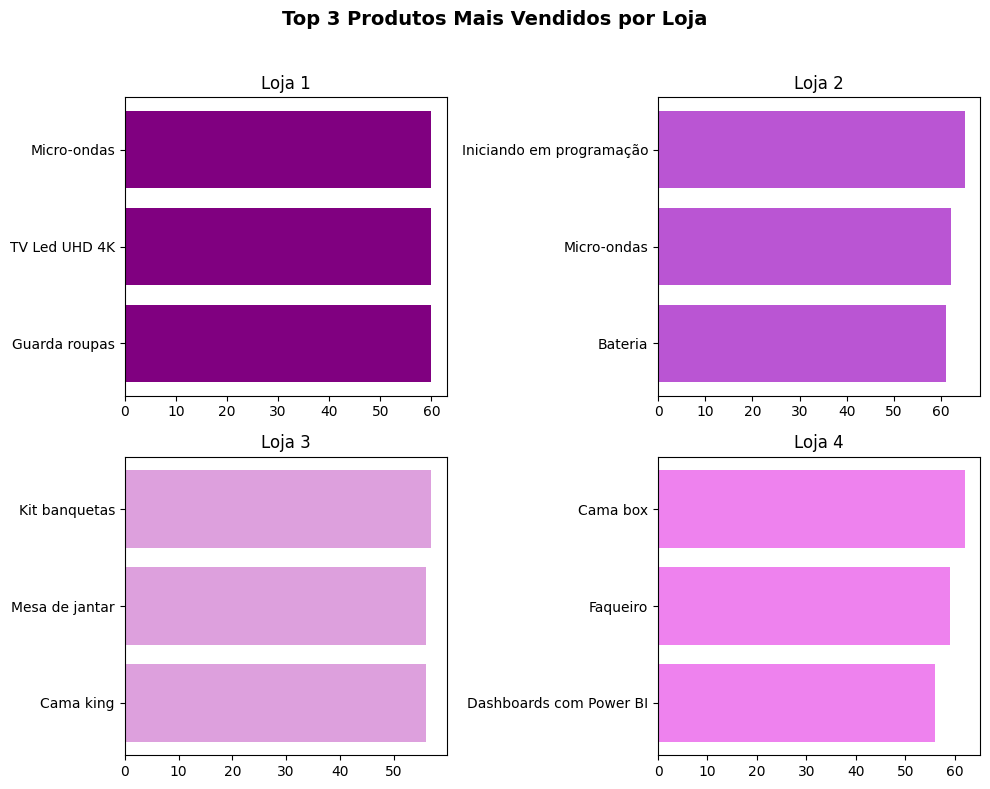

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Top 3 Produtos Mais Vendidos por Loja', fontsize=14, fontweight='bold')

# Loja 1
axs[0,0].barh(top1['Produto Loja 1'], top1['Qde Loja 1'], color='purple')
axs[0,0].set_title('Loja 1')
axs[0,0].invert_yaxis()

# Loja 2
axs[0,1].barh(top2['Produto Loja 2'], top2['Qde Loja 2'], color='mediumorchid')
axs[0,1].set_title('Loja 2')
axs[0,1].invert_yaxis()

# Loja 3
axs[1,0].barh(top3['Produto Loja 3'], top3['Qde Loja 3'], color='plum')
axs[1,0].set_title('Loja 3')
axs[1,0].invert_yaxis()

# Loja 4
axs[1,1].barh(top4['Produto Loja 4'], top4['Qde Loja 4'], color='violet')
axs[1,1].set_title('Loja 4')
axs[1,1].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [16]:
menos1 = loja1['Produto'].value_counts().tail(3).reset_index()
menos2 = loja2['Produto'].value_counts().tail(3).reset_index()
menos3 = loja3['Produto'].value_counts().tail(3).reset_index()
menos4 = loja4['Produto'].value_counts().tail(3).reset_index()

In [17]:
menos1.columns = ['Produto Loja 1', 'Qde Loja 1']
menos2.columns = ['Produto Loja 2', 'Qde Loja 2']
menos3.columns = ['Produto Loja 3', 'Qde Loja 3']
menos4.columns = ['Produto Loja 4', 'Qde Loja 4']

tabela_menos3 = pd.concat([menos1, menos2, menos3, menos4], axis=1)

print(tabela_menos3)

      Produto Loja 1  Qde Loja 1     Produto Loja 2  Qde Loja 2  \
0  Panela de pressão          35     Mesa de jantar          34   
1            Headset          33         Impressora          34   
2       Celular ABXY          33  Jogo de tabuleiro          32   

     Produto Loja 3  Qde Loja 3 Produto Loja 4  Qde Loja 4  
0           Mochila          36         Violão          37  
1       Micro-ondas          36  Guarda roupas          34  
2  Blocos de montar          35       Guitarra          33  


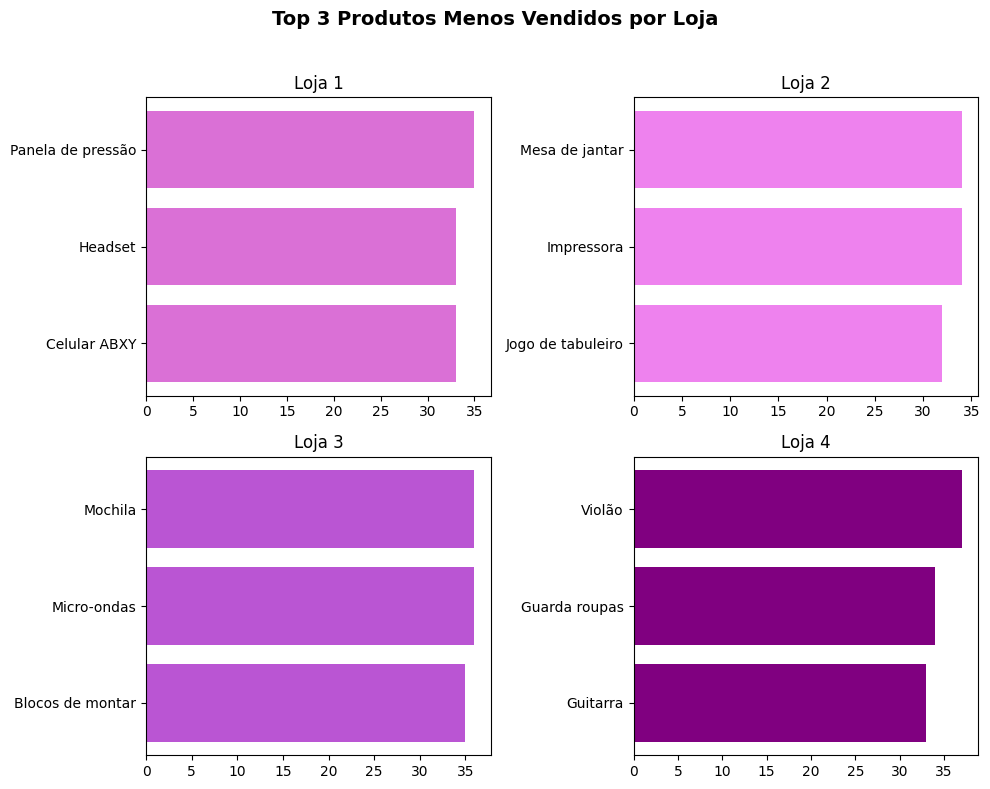

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Top 3 Produtos Menos Vendidos por Loja', fontsize=14, fontweight='bold')

# Loja 1
axs[0,0].barh(menos1['Produto Loja 1'], menos1['Qde Loja 1'], color='orchid')
axs[0,0].set_title('Loja 1')
axs[0,0].invert_yaxis()

# Loja 2
axs[0,1].barh(menos2['Produto Loja 2'], menos2['Qde Loja 2'], color='violet')
axs[0,1].set_title('Loja 2')
axs[0,1].invert_yaxis()

# Loja 3
axs[1,0].barh(menos3['Produto Loja 3'], menos3['Qde Loja 3'], color='mediumorchid')
axs[1,0].set_title('Loja 3')
axs[1,0].invert_yaxis()

# Loja 4
axs[1,1].barh(menos4['Produto Loja 4'], menos4['Qde Loja 4'], color='purple')
axs[1,1].set_title('Loja 4')
axs[1,1].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 5. Frete Médio por Loja

In [19]:
frete_loja1 = loja1['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

In [20]:
tabela_frete = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Medio': [frete_loja1, frete_loja2, frete_loja3, frete_loja4]
})

print(tabela_frete)

     Loja  Frete Medio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


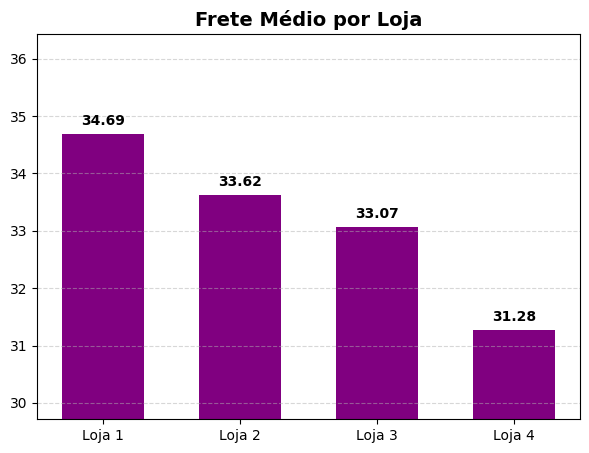

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(
    tabela_frete['Loja'],
    tabela_frete['Frete Medio'],
    color='purple',
    width=0.6
)

# Adiciona os valores em cima das barras
for i, valor in enumerate(tabela_frete['Frete Medio']):
    plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title('Frete Médio por Loja', fontsize=14, fontweight='bold')
plt.ylim(tabela_frete['Frete Medio'].min() * 0.95, tabela_frete['Frete Medio'].max() * 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 6. Análise de Desempenho Geográfico

In [23]:
print(loja1[['lat', 'lon']].describe())

               lat          lon
count  2359.000000  2359.000000
mean    -20.763366   -47.349385
std       5.372400     4.183180
min     -30.170000   -70.550000
25%     -22.250000   -48.790000
50%     -22.190000   -48.790000
75%     -18.100000   -44.380000
max       1.410000   -36.590000


In [25]:
print(loja2[['lat', 'lon']].describe())

               lat          lon
count  2359.000000  2359.000000
mean    -20.473243   -47.098508
std       5.321015     4.169111
min     -30.170000   -70.550000
25%     -22.250000   -48.790000
50%     -22.190000   -48.790000
75%     -18.100000   -44.380000
max       1.990000   -36.590000


In [26]:
print(loja3[['lat', 'lon']].describe())

               lat          lon
count  2359.000000  2359.000000
mean    -20.405396   -47.129233
std       5.465572     4.197520
min     -30.170000   -70.550000
25%     -22.250000   -48.790000
50%     -22.190000   -48.790000
75%     -18.100000   -44.380000
max       1.990000   -36.590000


In [27]:
print(loja4[['lat', 'lon']].describe())

               lat          lon
count  2358.000000  2358.000000
mean    -20.494215   -47.107553
std       5.433033     4.159156
min     -30.170000   -65.100000
25%     -22.250000   -48.790000
50%     -22.190000   -48.790000
75%     -18.100000   -44.380000
max       1.410000   -36.590000


In [43]:
!pip install folium
import folium

In [46]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[-14, -52], zoom_start=4)

cores = {
    "Loja 1": "purple",
    "Loja 2": "gray",
    "Loja 3": "red",
    "Loja 4": "orange"
}

for loja, cor in zip([loja1, loja2, loja3, loja4], cores.values()):
    HeatMap(
        loja[['lat', 'lon']].values,
        radius=8,
        blur=15,
        gradient={0.4: cor, 1: cor},
        name=f"Vendas {cor.capitalize()}"
    ).add_to(m)

folium.LayerControl().add_to(m)

m

#Relatório Final — Análise de Desempenho das Lojas

O objetivo desta análise é identificar qual das quatro lojas do Senhor João apresenta o pior desempenho geral e, portanto, deve ser vendida.

Foram avaliados os indicadores:

- Faturamento total por loja;
- Categorias de produtos mais e menos vendidas;
- Avaliação média dos clientes;
- Produtos mais e menos vendidos;
- Frete médio cobrado em cada loja.

As análises foram apoiadas por gráficos e tabelas que permitiram compreender os pontos fortes e fracos de cada unidade.

##1. Faturamento Total

| Loja   | Faturamento (R$) |
|--------|------------------:|
| Loja 1 | 1.534.509,12     |
| Loja 2 | 1.488.459,06     |
| Loja 3 | 1.464.025,03     |
| Loja 4 | 1.384.497,58     |

A Loja 1 apresentou o maior faturamento, demonstrando melhor desempenho em volume de vendas e retorno financeiro. Já a Loja 4 possui o menor faturamento, indicando uma performance inferior em vendas totais.

##2. Categorias Mais e Menos Vendidas

As categorias mais vendidas entre todas as lojas foram Móveis e Eletrônicos, mostrando uma preferência dos clientes por produtos de maior valor agregado e uso cotidiano.

As categorias menos vendidas foram Instrumentos Musicais, Livros e Utilidades Domésticas, com menor representatividade no volume total de vendas.

Esse padrão sugere que o foco comercial deve permanecer nos segmentos que trazem maior retorno, reduzindo o investimento em categorias com baixa saída.

##3. Avaliação Média dos Clientes
| Loja   | Avaliação Média |
|--------|----------------:|
| Loja 1 | 3,98            |
| Loja 2 | 4,04            |
| Loja 3 | 4,05            |
| Loja 4 | 3,99            |

As Lojas 2 e 3 obtiveram as melhores médias de avaliação, com notas acima de 4, o que indica maior satisfação dos clientes em relação à experiência de compra e atendimento.
A Loja 1, embora apresente o maior faturamento, possui uma avaliação ligeiramente inferior.

##4. Produtos Mais Vendidos

Entre os produtos mais vendidos destacam-se itens como TV Led 4K, Micro-ondas, Cama Box e Mesa de Jantar.
Esses produtos se repetem em várias lojas, confirmando sua importância para o desempenho geral e indicando boa aceitação no mercado.

##5. Produtos Menos Vendidos

Os produtos menos vendidos incluem Headset, Violão, Livros e Blocos de Montar.
Esses itens apresentam baixa rotatividade e podem ser alvo de ações promocionais ou descontinuação, a fim de otimizar o espaço de estoque e aumentar a margem de lucro.

##6. Frete Médio
| Loja   | Frete Médio (R$) |
|--------|-----------------:|
| Loja 1 | 34,69            |
| Loja 2 | 33,62            |
| Loja 3 | 33,07            |
| Loja 4 | 31,28            |

A Loja 4 possui o menor frete médio, o que demonstra eficiência logística.
Entretanto, esse fator isolado não compensa o baixo faturamento e o desempenho inferior em vendas.

##7. Distribuição Geográfica das Vendas

Os mapas de calor mostram que as vendas estão amplamente distribuídas pelo Brasil, com maior concentração nas regiões Sudeste e Sul, especialmente em São Paulo, Minas Gerais e Paraná.
Também há presença moderada no Nordeste e menor intensidade nas regiões Norte e Centro-Oeste.

De modo geral, todas as lojas apresentam alcance geográfico semelhante, indicando que a localização não é um fator determinante nas diferenças de desempenho entre elas. Essas concentrações coincidem com as áreas de maior densidade populacional e poder de consumo do país, reforçando que as lojas têm bom alcance comercial em áreas estratégicas.

##Conclusão

Com base em todas as análises apresentadas, a recomendação é que o Senhor João venda a Loja 4.

Apesar de possuir o menor custo de frete, a Loja 4 apresenta os piores resultados em faturamento total e desempenho de vendas por categoria. Sua avaliação média também é apenas mediana, sem se destacar em nenhum indicador relevante.

Por outro lado, a Loja 1 deve ser mantida como principal operação, pois demonstra o melhor resultado financeiro e equilíbrio entre volume de vendas e avaliação dos clientes.

As Lojas 2 e 3 também apresentam bom desempenho e podem ser mantidas, com potencial de crescimento baseado na boa avaliação e estabilidade das vendas.

#Resumo da Decisão
| Loja   | Situação Recomendada | Justificativa                               |
|--------|----------------------|---------------------------------------------|
| Loja 1 | Manter               | Maior faturamento e bom desempenho geral    |
| Loja 2 | Manter               | Boa avaliação e desempenho estável          |
| Loja 3 | Manter               | Boa avaliação e vendas equilibradas         |
| Loja 4 | Vender               | Menor faturamento e baixo desempenho geral  |
